# Basic ML-based Credit Risk Modelling

## Background


1.   We are working as Data scientist in a risk analyst in a finance industry.
2.   Our company here making profit by giving loan to customers
3.   Thus, if a customer somehow don't pay back his loan, then we suffer a loss. These customers are called default customers.
4.   In order to minimize these loss, we want to prevent to give loans to would-be default customers.
5.   Our work here to make a classifier model to classify default customers, given customer data.



## Data Prep

Here we are going to load libraries required.

In [1]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

## this notebook use secret key to hide dataset's file path
from google.colab import userdata
dataset = userdata.get('DATA_SET1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

## plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

### Load Data

Data are taken directly from [here](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

In [3]:
data = pd.read_csv(dataset)
display(data.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
## first check if there is duplicates, and remove them
cek_dup = data.duplicated()
display(cek_dup.value_counts())
print(len(data))

# remove duplicates
data = data.drop_duplicates()
print(len(data))

,count
False,32416
True,165


32581
32416


In [5]:
## check inconsistent data
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


None

In [6]:
## remove data that has output not between 0 and 1
y_col = 'loan_status'
data = data[(data[y_col]>=0) & (data[y_col]<=1)]
display(data[y_col].value_counts())
print(len(data))

,count
loan_status,
0,25327
1,7089


32416


In [7]:
## remove data with historical default outside Y nor N
data = data[(data['cb_person_default_on_file']=='Y') | (data['cb_person_default_on_file']=='N')]
print(len(data))

32416


In [8]:
## remove data that has negative on any numeric columns
numerik = ['person_age', 'person_income', 'person_emp_length',
           'loan_amnt', 'loan_int_rate', 'loan_percent_income',
           'cb_person_cred_hist_length']

for isi in numerik:
  data = data[(data[isi]>=0)]

print(len(data))

28501


In [9]:
## remove data with person age that less than employment length
age_th = 0 ## threshold. Increase to remove data with possible child labor (like, age is 20 but employment is 12)
data = data[data['person_age'] - data['person_emp_length'] > age_th]
display(data.head())
print(len(data))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


28499


### Train-Test Split

In [10]:
# split the data into input X and output y
X_col = list(data.columns)
X_col.remove(y_col)

## split the data into train-test data
y = data[y_col]
X = data[X_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # for replication
)

### Perform EDA

In [11]:
## look for nans
nan_df = X_train.isna().sum(0)
display(nan_df)

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


*   No NaNs on categorical-data, so no imputation for these later
*   We also have no NaNs on numerical. In case that we have them, NaNs on numerical features will be considered when looking at their distribution







In [12]:
## first perform EDA with categorical variables
obj_var = ['person_home_ownership', 'loan_intent',
           'loan_grade', 'cb_person_default_on_file']

for i in obj_var:
  display(X_train[i].value_counts())

,count
person_home_ownership,
RENT,11564
MORTGAGE,9438
OWN,1727
OTHER,70


,count
loan_intent,
EDUCATION,4490
MEDICAL,4234
VENTURE,3981
PERSONAL,3871
DEBTCONSOLIDATION,3646
HOMEIMPROVEMENT,2577


,count
loan_grade,
A,7493
B,7284
C,4548
D,2576
E,684
F,165
G,49


,count
cb_person_default_on_file,
N,18716
Y,4083


Looking from these information:

1.   Here we consider that loan_grade is ordinal (categorical but can be ordered) while cb_person_default_on_file is binary. Thus we are going to consider 2 encoders for this case.
2.   person_home_ownership has OTHER as it's entry. Here we consider this value as NaNs.





In [13]:
## define categories to be considered by model
pho_cat = list(X_train['person_home_ownership'].value_counts().index)
pho_cat.remove('OTHER') ## consider OTHER as NaNs
li_cat = list(X_train['loan_intent'].value_counts().index)
lg_cat = list(X_train['loan_grade'].value_counts().index)
dof_cat = list(X_train['cb_person_default_on_file'].value_counts().index)
dof_cat.remove('Y') ## consider Y on this binary feature as non-default
print(pho_cat)
print(li_cat)
print(lg_cat)
print(dof_cat)

['RENT', 'MORTGAGE', 'OWN']
['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['N']


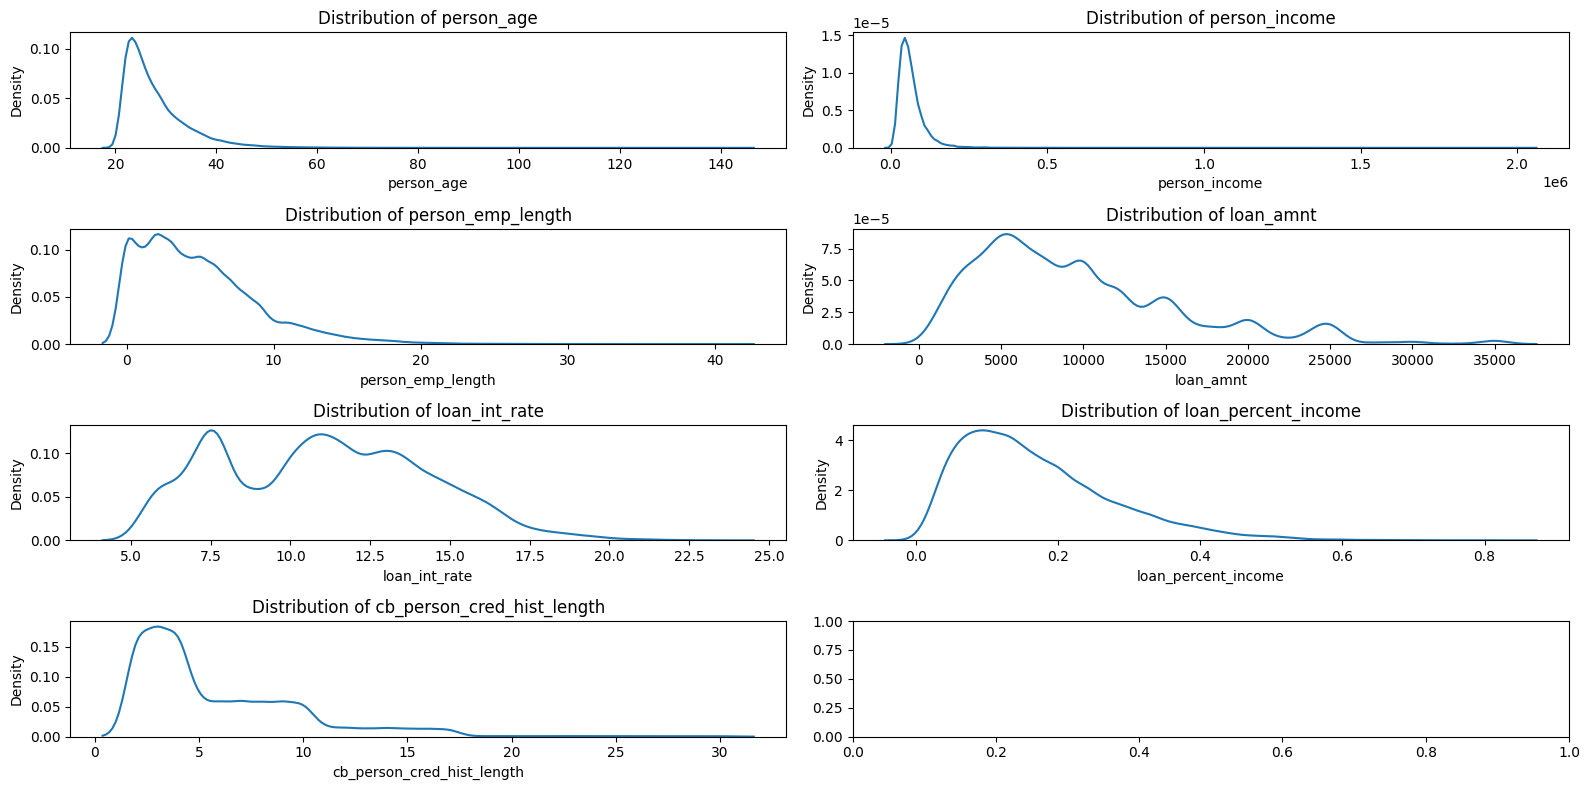

In [14]:
## now perform EDA for other data types

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 8))
axes = ax.flatten()

for i, col in enumerate(X_train[numerik].columns):
    sns.kdeplot(X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

we found that the data typically skewed. Thus, NaNs on numerical features are considered as median on that feature.

In [15]:
## lastly, we consider to empasize to minimize False Non-default:
## predicting non-default (0) on default target (1)
## thus we have to weight default target more than non-default
## this can be done using class weight

# for this note, the weight for 0 is set to 1
## while the other is arbitrary set, but more than 1
class_weight = {0: 1, 1: 3.5}

#### Conclusion of EDA


1.   Considering the nature of categorical data, we are going to make 2 different encodings, one-hot and ordinal
2.   We assume OTHER in person_home_ownership and Y on default history as NaNs for our model.
4.   Skewed data calls for median-based imputation for missing numerical features.
5.   Outlier Removal and Correlation are handled on Data Preprocessing step



### Data Preprocessing

#### Categorical Data Encoding

In [16]:
## make encoding

## define feature for one-hot encoding
obj_var1 = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

# first, make basic encoder for home ownership, loan_intent, and default_on_file
# set all encoder value to 0 if a category is not seen during fitting
# or not listed in categories
enc_1 = OneHotEncoder(handle_unknown='ignore',
                      categories=[pho_cat, li_cat, dof_cat],
                      sparse_output=False) ## for easier printing
enc_1.fit(X_train[obj_var1])

## next is Ordinal encoder for loan_grade
## here we assume that worst rating is G, and unknown value is set to 7
X_grade = X_train['loan_grade'].to_frame()
enc_2 = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']], # sorted category
                       handle_unknown='use_encoded_value',
                       unknown_value=7)
enc_2.fit(X_grade)

OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']],
               handle_unknown='use_encoded_value', unknown_value=7)

In [17]:
## transform training and test data

## training data
X_train_enc1 = enc_1.transform(X_train[obj_var1])
# print(X_train_enc1[0:10,:])
# print(enc_1.get_feature_names_out())
X_train_enc1 = pd.DataFrame(X_train_enc1, index=X_train.index,
                            columns=enc_1.get_feature_names_out())
# display(X_train_enc1.head())

X_train_enc2 = enc_2.transform(X_train['loan_grade'].to_frame())
# print(X_train_enc2[0:10,:])
# print(enc_2.get_feature_names_out())
X_train_enc2 = pd.DataFrame(X_train_enc2, index=X_train.index,
                            columns=enc_2.get_feature_names_out())
# display(X_train_enc2.head())

## merge encoded result
X_train_enc = X_train_enc1.merge(X_train_enc2,
                                 how='inner',
                                 left_index=True, right_index=True) ## use index as keys

## merge encoded input with numericals

X_train_all = X_train[numerik].merge(X_train_enc,
                                     how='inner',
                                     left_index=True, right_index=True)

## train data to be fed to model
display(X_train_all.head(10))
print(len(X_train_all))

## test data
X_test_enc1 = enc_1.transform(X_test[obj_var1])
# print(X_test_enc1[0:10,:])
# print(enc_1.get_feature_names_out())
X_test_enc1 = pd.DataFrame(X_test_enc1, index=X_test.index,
                            columns=enc_1.get_feature_names_out())
# display(X_test_enc1.head())

X_test_enc2 = enc_2.transform(X_test['loan_grade'].to_frame())
# print(X_test_enc2[0:10,:])
# print(enc_2.get_feature_names_out())
X_test_enc2 = pd.DataFrame(X_test_enc2, index=X_test.index,
                            columns=enc_2.get_feature_names_out())
# display(X_test_enc2.head())

## merge encoded result
X_test_enc = X_test_enc1.merge(X_test_enc2,
                                 how='inner',
                                 left_index=True, right_index=True) ## use index as keys

## merge encoded input with numericals

X_test_all = X_test[numerik].merge(X_test_enc,
                                     how='inner',
                                     left_index=True, right_index=True)

## test data to be fed to model
display(X_test_all.head(10))
print(len(X_test_all))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_DEBTCONSOLIDATION,loan_intent_HOMEIMPROVEMENT,cb_person_default_on_file_N,loan_grade
17598,21,23000,2.0,7000,8.90,0.30,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26017,32,33600,0.0,8000,16.02,0.24,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6514,23,45000,7.0,6000,11.49,0.13,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6056,23,25000,0.0,5800,9.91,0.23,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3519,22,45000,0.0,10500,6.99,0.23,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18470,29,99855,2.0,20000,17.06,0.20,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
20679,28,32000,5.0,5000,6.99,0.16,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18347,32,55000,2.0,20000,11.83,0.36,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4651,24,46000,2.0,9975,13.11,0.22,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
9987,22,65000,2.0,10000,11.11,0.15,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


22799


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_DEBTCONSOLIDATION,loan_intent_HOMEIMPROVEMENT,cb_person_default_on_file_N,loan_grade
10315,26,66504,10.0,12000,12.53,0.18,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
27938,27,30000,8.0,11000,9.91,0.37,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2480,21,14400,2.0,3000,9.63,0.21,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
21997,27,57000,0.0,7000,11.71,0.12,8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25486,33,85000,0.0,5000,13.61,0.06,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
17794,25,55000,3.0,24200,8.49,0.44,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7037,22,19200,2.0,6250,7.51,0.33,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9884,25,44000,9.0,9000,7.29,0.20,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3063,24,35004,5.0,7000,5.42,0.20,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30298,37,79000,2.0,6000,10.00,0.08,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


5700


In [18]:
print(X_train_all.shape)
print(y_train.shape)
print(X_test_all.shape)
print(y_test.shape)

(22799, 18)
(22799,)
(5700, 18)
(5700,)


#### Outlier removal

outlier removal considered in this note is IsolationForest. In order to buid best pratice, we are going to standardize the data then impute missing values with median before fitting isolation forest.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

In [20]:
## create outlier removal object
out_model = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median')),
    ('model', IsolationForest(random_state=33))
])

## fit outlier removal model
out_model.fit(X_train_all, y_train)

## define data sample that is outlier or not
is_inlier = out_model.predict(X_train_all)
inlier_df = pd.DataFrame({'is_inlier':is_inlier},
                         index=X_train_all.index)

## remove outlier data
X_train_all = X_train_all[(inlier_df['is_inlier']>0)]
display(X_train_all.head())
print(len(X_train_all))

## get indexes of inlier data, then get target
X_train_id = X_train_all.index
y_train = y_train[X_train_id]
display(y_train)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_MORTGAGE,person_home_ownership_OWN,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_DEBTCONSOLIDATION,loan_intent_HOMEIMPROVEMENT,cb_person_default_on_file_N,loan_grade
17598,21,23000,2.0,7000,8.90,0.30,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6514,23,45000,7.0,6000,11.49,0.13,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6056,23,25000,0.0,5800,9.91,0.23,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3519,22,45000,0.0,10500,6.99,0.23,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20679,28,32000,5.0,5000,6.99,0.16,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


16831


,loan_status
17598,0
6514,0
6056,0
3519,0
20679,0
...,...
12846,0
13618,0
24663,0
6204,0


#### Handling Correlation

Correlated feature pair are handled using KMeans on absolute correlation matrix. The idea is to cluster features based on it's absolute correlation. Here, we assume that a pair of features in the same (different) cluster has high (low) correlation. Thus, we only pick 1 feature for each clusters to fed into model. The quality of clusters are measured via Sillhoute Coefficient.

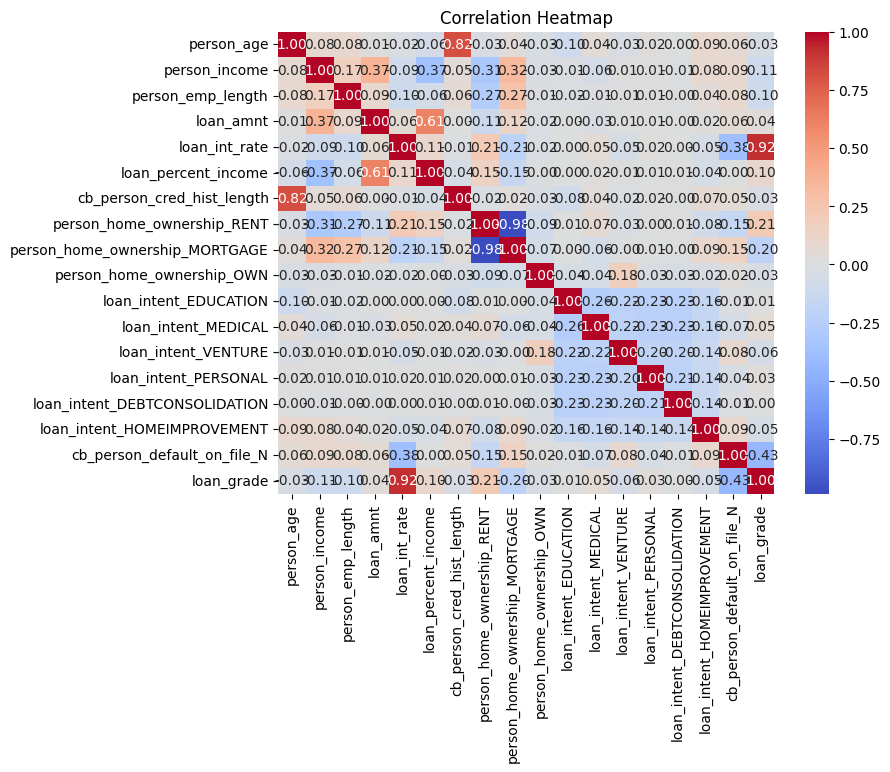

In [21]:
## now we check for feature correlation on numerical features

corr_pd = X_train_all.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr_pd, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## find the most distinguishable clusters

## first test: 2 clusters
kmean = KMeans(n_clusters=2, random_state=33)
kmean.fit(abs(corr_pd))
clus = kmean.predict(abs(corr_pd))
skor = silhouette_score(abs(corr_pd), clus)


## test for more number of clusters
for i in range(3, len(corr_pd)):
  kmean = KMeans(n_clusters=i, random_state=33)
  kmean.fit(abs(corr_pd))
  dum_clus = kmean.predict(abs(corr_pd))
  dum_skor = silhouette_score(abs(corr_pd), dum_clus)

  if dum_skor > skor: ## if better score obtained:
    skor = dum_skor
    clus = dum_clus


In [23]:
import numpy as np

## now pick first columns for each clusters
all_ok = []
for i in range(0, max(clus)+1):
  early = np.argmax(clus==i)
  fitur_ok = list(X_train_all.columns)[early]
  all_ok.append(fitur_ok)

X_train_all = X_train_all[all_ok]
display(X_train_all)

X_test_all = X_test_all[all_ok]
display(X_test_all)

,loan_int_rate,person_income,person_home_ownership_OWN,person_emp_length,person_age
17598,8.90,23000,0.0,2.0,21
6514,11.49,45000,0.0,7.0,23
6056,9.91,25000,0.0,0.0,23
3519,6.99,45000,0.0,0.0,22
20679,6.99,32000,0.0,5.0,28
...,...,...,...,...,...
12846,10.38,85000,0.0,4.0,24
13618,7.90,95000,0.0,2.0,22
24663,11.11,75000,0.0,14.0,34
6204,9.99,27031,0.0,2.0,26


,loan_int_rate,person_income,person_home_ownership_OWN,person_emp_length,person_age
10315,12.53,66504,0.0,10.0,26
27938,9.91,30000,0.0,8.0,27
2480,9.63,14400,0.0,2.0,21
21997,11.71,57000,0.0,0.0,27
25486,13.61,85000,0.0,0.0,33
...,...,...,...,...,...
840,7.51,22800,0.0,5.0,22
351,7.90,16000,1.0,7.0,23
8622,6.62,59500,0.0,9.0,26
30897,8.59,38000,0.0,3.0,38


## Modelling

In [24]:
## load important libraries here
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold

### Metric

For this task, we obviously want to predict default/non-default customers as accurate as possible.

However, the damage of predicting default customers as non-default (false non-default) is much higher than predicting non-default customers as default (false default). Thus we want to drive the selection process to avoid more false non-default than false default.

We can consider 2 approaches: Weighted class and custom score. Weighted class, which is applied in-training, are already defined at Perform EDA section. Custom score, which applied in validation, will defined here.

In [25]:
## make function on how this custom score works
def custom_score(y_true, y_pred):
  com1 =   1*sum(y_true < y_pred) ## false positive/default
  com2 = 3.5*sum(y_true > y_pred) ## false negative/non-default
  return com1 + com2

## convert the function to score
score = make_scorer(custom_score,
                    greater_is_better=False) # we want to minimize this score

### Baseline

For baseline, we are going to test "accept all" or "reject all" strategy

In [26]:
## prepare strateifiedKFold split
skf = StratifiedKFold()
skf.split(X_train_all, y_train)

<generator object _BaseKFold.split at 0x7ede8c9a0480>

In [27]:
dummy = DummyClassifier(strategy='constant')

dummy_param = {'constant': [0, 1]}
# 0 means accept all strategy
# 1 means reject all strategy

best_dummy = GridSearchCV(dummy, dummy_param,
                          scoring=score,
                          cv=skf)

best_dummy.fit(X_train_all, y_train)

display(best_dummy)
dummy_valid = best_dummy.best_score_

print(f'Baseline validation accuracy: {-1*dummy_valid}')
print(best_dummy.best_params_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DummyClassifier(strategy='constant'),
             param_grid={'constant': [0, 1]},
             scoring=make_scorer(custom_score, greater_is_better=False, response_method='predict'))

Baseline validation accuracy: 2139.9
{'constant': 0}


Thus our baseline here is 2139.9 on score. The constant parameter picked was 0, thus the best baseline strategy is to accept all loans.

### Model

The model considered in this notebook is Desicion Tree. Parameters to be tuned are max_depth (1 to 14) and min_sample_split (2^1 to 2^7). This model is placed inside a pipeline with the following scheme.

1. Standard Scaler
2. Median Imputer
3. PCA with full components
4. Decision Tree

In [28]:
## load required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [29]:
dt = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median')),
    ('PCA', PCA(whiten=True)),
    ('model', DecisionTreeClassifier(random_state=33, class_weight=class_weight))
])

dt_param = {'model__max_depth': [i for i in range(1,15)],
            'model__min_samples_split': [2**i for i in range(1,8)]}

best_dt = GridSearchCV(dt, dt_param,
                       scoring=score,
                       cv=skf,
                       verbose=1)

best_dt.fit(X_train_all, y_train)

display(best_dt)
dt_valid = best_dt.best_score_

print(f'Decision Tree validation accuracy: {-1*dt_valid}')

Fitting 5 folds for each of 98 candidates, totalling 490 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('PCA', PCA(whiten=True)),
                                       ('model',
                                        DecisionTreeClassifier(class_weight={0: 1,
                                                                             1: 3.5},
                                                               random_state=33))]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'model__min_samples_split': [2, 4, 8, 16, 32, 64,
                                                      128]},
             scoring=make_scorer(custom_score, greater_is_better=False, response_method='predict'),
             verbose=1)

Decision Tree validation accuracy: 1415.6


## Evaluation

### Test data performance

Here we are going to test the model on test data. We also test the Accept All strategy as benchmark. Both the model and benchmark are tested using confusion matrix, in addition to simple accuracy metric.

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
## the best model prediction
best_pred = best_dt.predict(X_test_all)
best_score = custom_score(y_test, best_pred)
print(f'Tuned Model Test Accuracy: {best_score}')

## accept all strategy
dummy_pred = best_dummy.predict(X_test_all)
dummy_score = custom_score(y_test, dummy_pred)
print(f' Accept All Test Accuracy: {dummy_score}')

Tuned Model Test Accuracy: 2669.0
 Accept All Test Accuracy: 4343.5


Tuned model achieve better score than accept all baseline. Thus the tuned model perform better against accept all strategy.

The following show 4 components of confusion matrix for both tuned and baseline model.

In [32]:
## confusion metrix component: best model
best_tp = ((y_test==1) & (best_pred==1)).sum()
best_tn = ((y_test==0) & (best_pred==0)).sum()
best_fp = ((y_test==0) & (best_pred==1)).sum()
best_fn = ((y_test==1) & (best_pred==0)).sum()

## confusion metrix component: accept all
dummy_tp = ((y_test==1) & (dummy_pred==1)).sum()
dummy_tn = ((y_test==0) & (dummy_pred==0)).sum()
dummy_fp = ((y_test==0) & (dummy_pred==1)).sum()
dummy_fn = ((y_test==1) & (dummy_pred==0)).sum()

all_sample = len(y_test)

cm_df = pd.DataFrame({'Result': ['True Default', 'True Non-Default', 'False Default', 'False Non-Default'],
                      'Tuned': [best_tp, best_tn, best_fp, best_fn],
                      'Acc. All': [dummy_tp, dummy_tn, dummy_fp, dummy_fn]})

display(cm_df)

,Result,Tuned,Acc. All
0,True Default,789,0
1,True Non-Default,3372,4459
2,False Default,1087,0
3,False Non-Default,452,1241


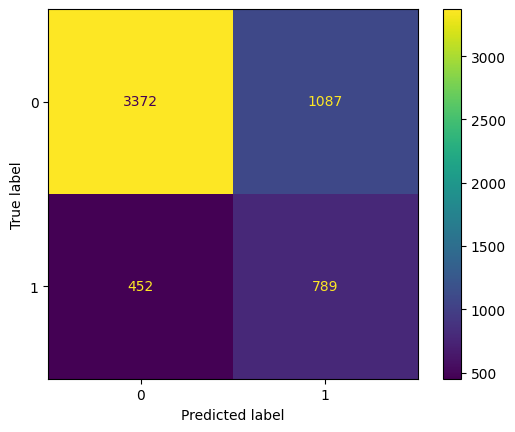

In [33]:
## confusion matrix for best model
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=best_pred)
plt.show()

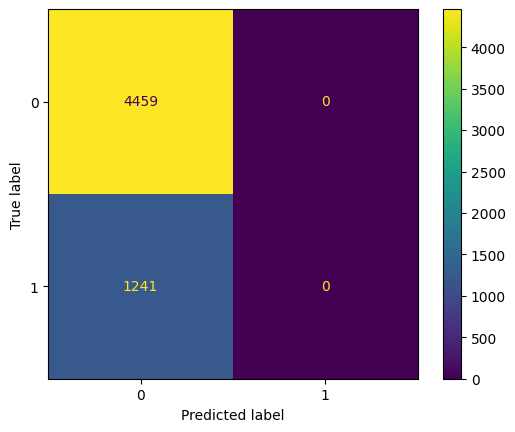

In [34]:
## confusion matrix for accept_all
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=dummy_pred)
plt.show()

### Financial Impact

The financial impact of both tuned and accept all strategies are:

*   False Default (namely, actual Non-default borrowers predicted as default one) costs Rp. 10M.
*   False Non-Default (namely, actual default borrowers predicted as non-default one) costs Rp. 35M.



In [35]:
## We can compute the loss as follows (Loss in M)
best_loss  = 10*best_fp + 35*best_fn
dummy_loss = 10*dummy_fp + 35*dummy_fn

print(f'Potential loss from tuned model: Rp. {best_loss} M')
print(f' Potential loss from accept all: Rp. {dummy_loss} M')

Potential loss from tuned model: Rp. 26690 M
 Potential loss from accept all: Rp. 43435 M


Here we see that the potential loss from tuned model is lower than baseline, thus more safer. However, we must admit that the improvement of the model against baseline is less than 50%.